# Singular Value Decomposition

This notebook introduces the `da.linalg.svd` algorithms for the Singular Value Decomposition

## Start Dask Client for Dashboard

Starting the Dask Client is optional.  It will provide a dashboard which 
is useful to gain insight on the computation.  

The link to the dashboard will become visible when you create the client below.  We recommend having it open on one side of your screen while using your notebook on the other side.  This can take some effort to arrange your windows, but seeing them both at the same is very useful when learning.

In [1]:
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')
client

<Client: 'inproc://10.20.0.209/15605/1' processes=1 threads=4, memory=2.00 GB>

## Compute SVD of Tall-and-Skinny Matrix

For many applications the provided matrix has many more rows than columns.  In this case a specialized algorithm can be used.

In [2]:
import dask.array as da

X = da.random.random((200000, 100), chunks=(10000, 100)).persist()

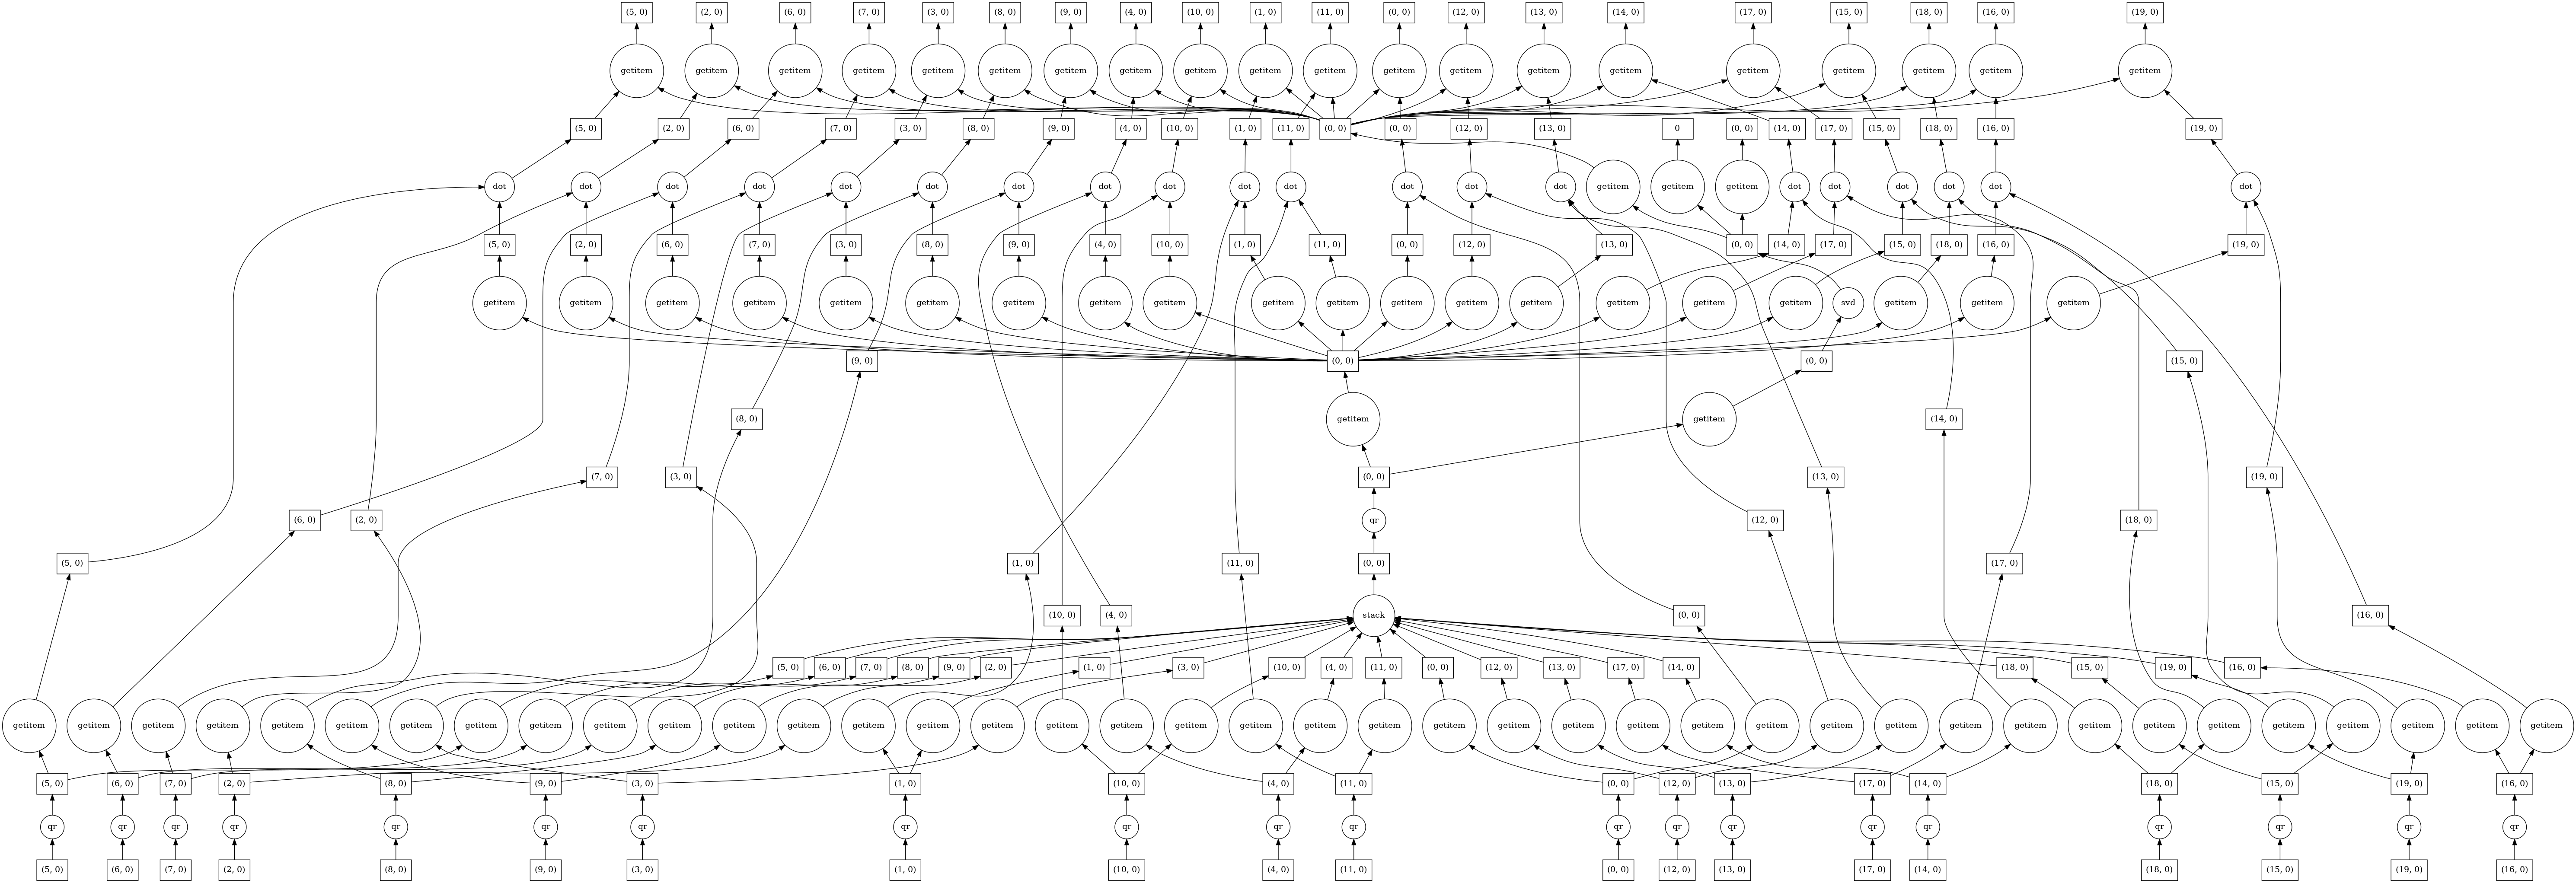

In [3]:
import dask

u, s, v = da.linalg.svd(X)
dask.visualize(u, s, v)

In [4]:
v.compute()

array([[ 0.09988439,  0.10002861,  0.10003789, ...,  0.10006128,
         0.10001984,  0.1000839 ],
       [-0.05097675, -0.01485993,  0.05302712, ..., -0.10446817,
         0.08403053, -0.00149932],
       [ 0.07849514, -0.16715968, -0.0134149 , ..., -0.07614997,
        -0.00219461, -0.03610846],
       ...,
       [ 0.07285712, -0.04892986, -0.03274942, ...,  0.08206047,
         0.07580282, -0.162312  ],
       [-0.08584218, -0.043174  ,  0.07149867, ...,  0.18962512,
         0.12480152,  0.04742439],
       [ 0.0787562 ,  0.08443366, -0.12686108, ...,  0.08854665,
         0.02516574, -0.08471079]])

## Compute SVD of General Non-Skinny Matrix with Approximate algorithm

When there are also many chunks in columns then we use an approximate randomized algorithm to collect only a few of the singular values and vectors.

In [5]:
import dask.array as da

X = da.random.random((10000, 10000), chunks=(2000, 2000)).persist()

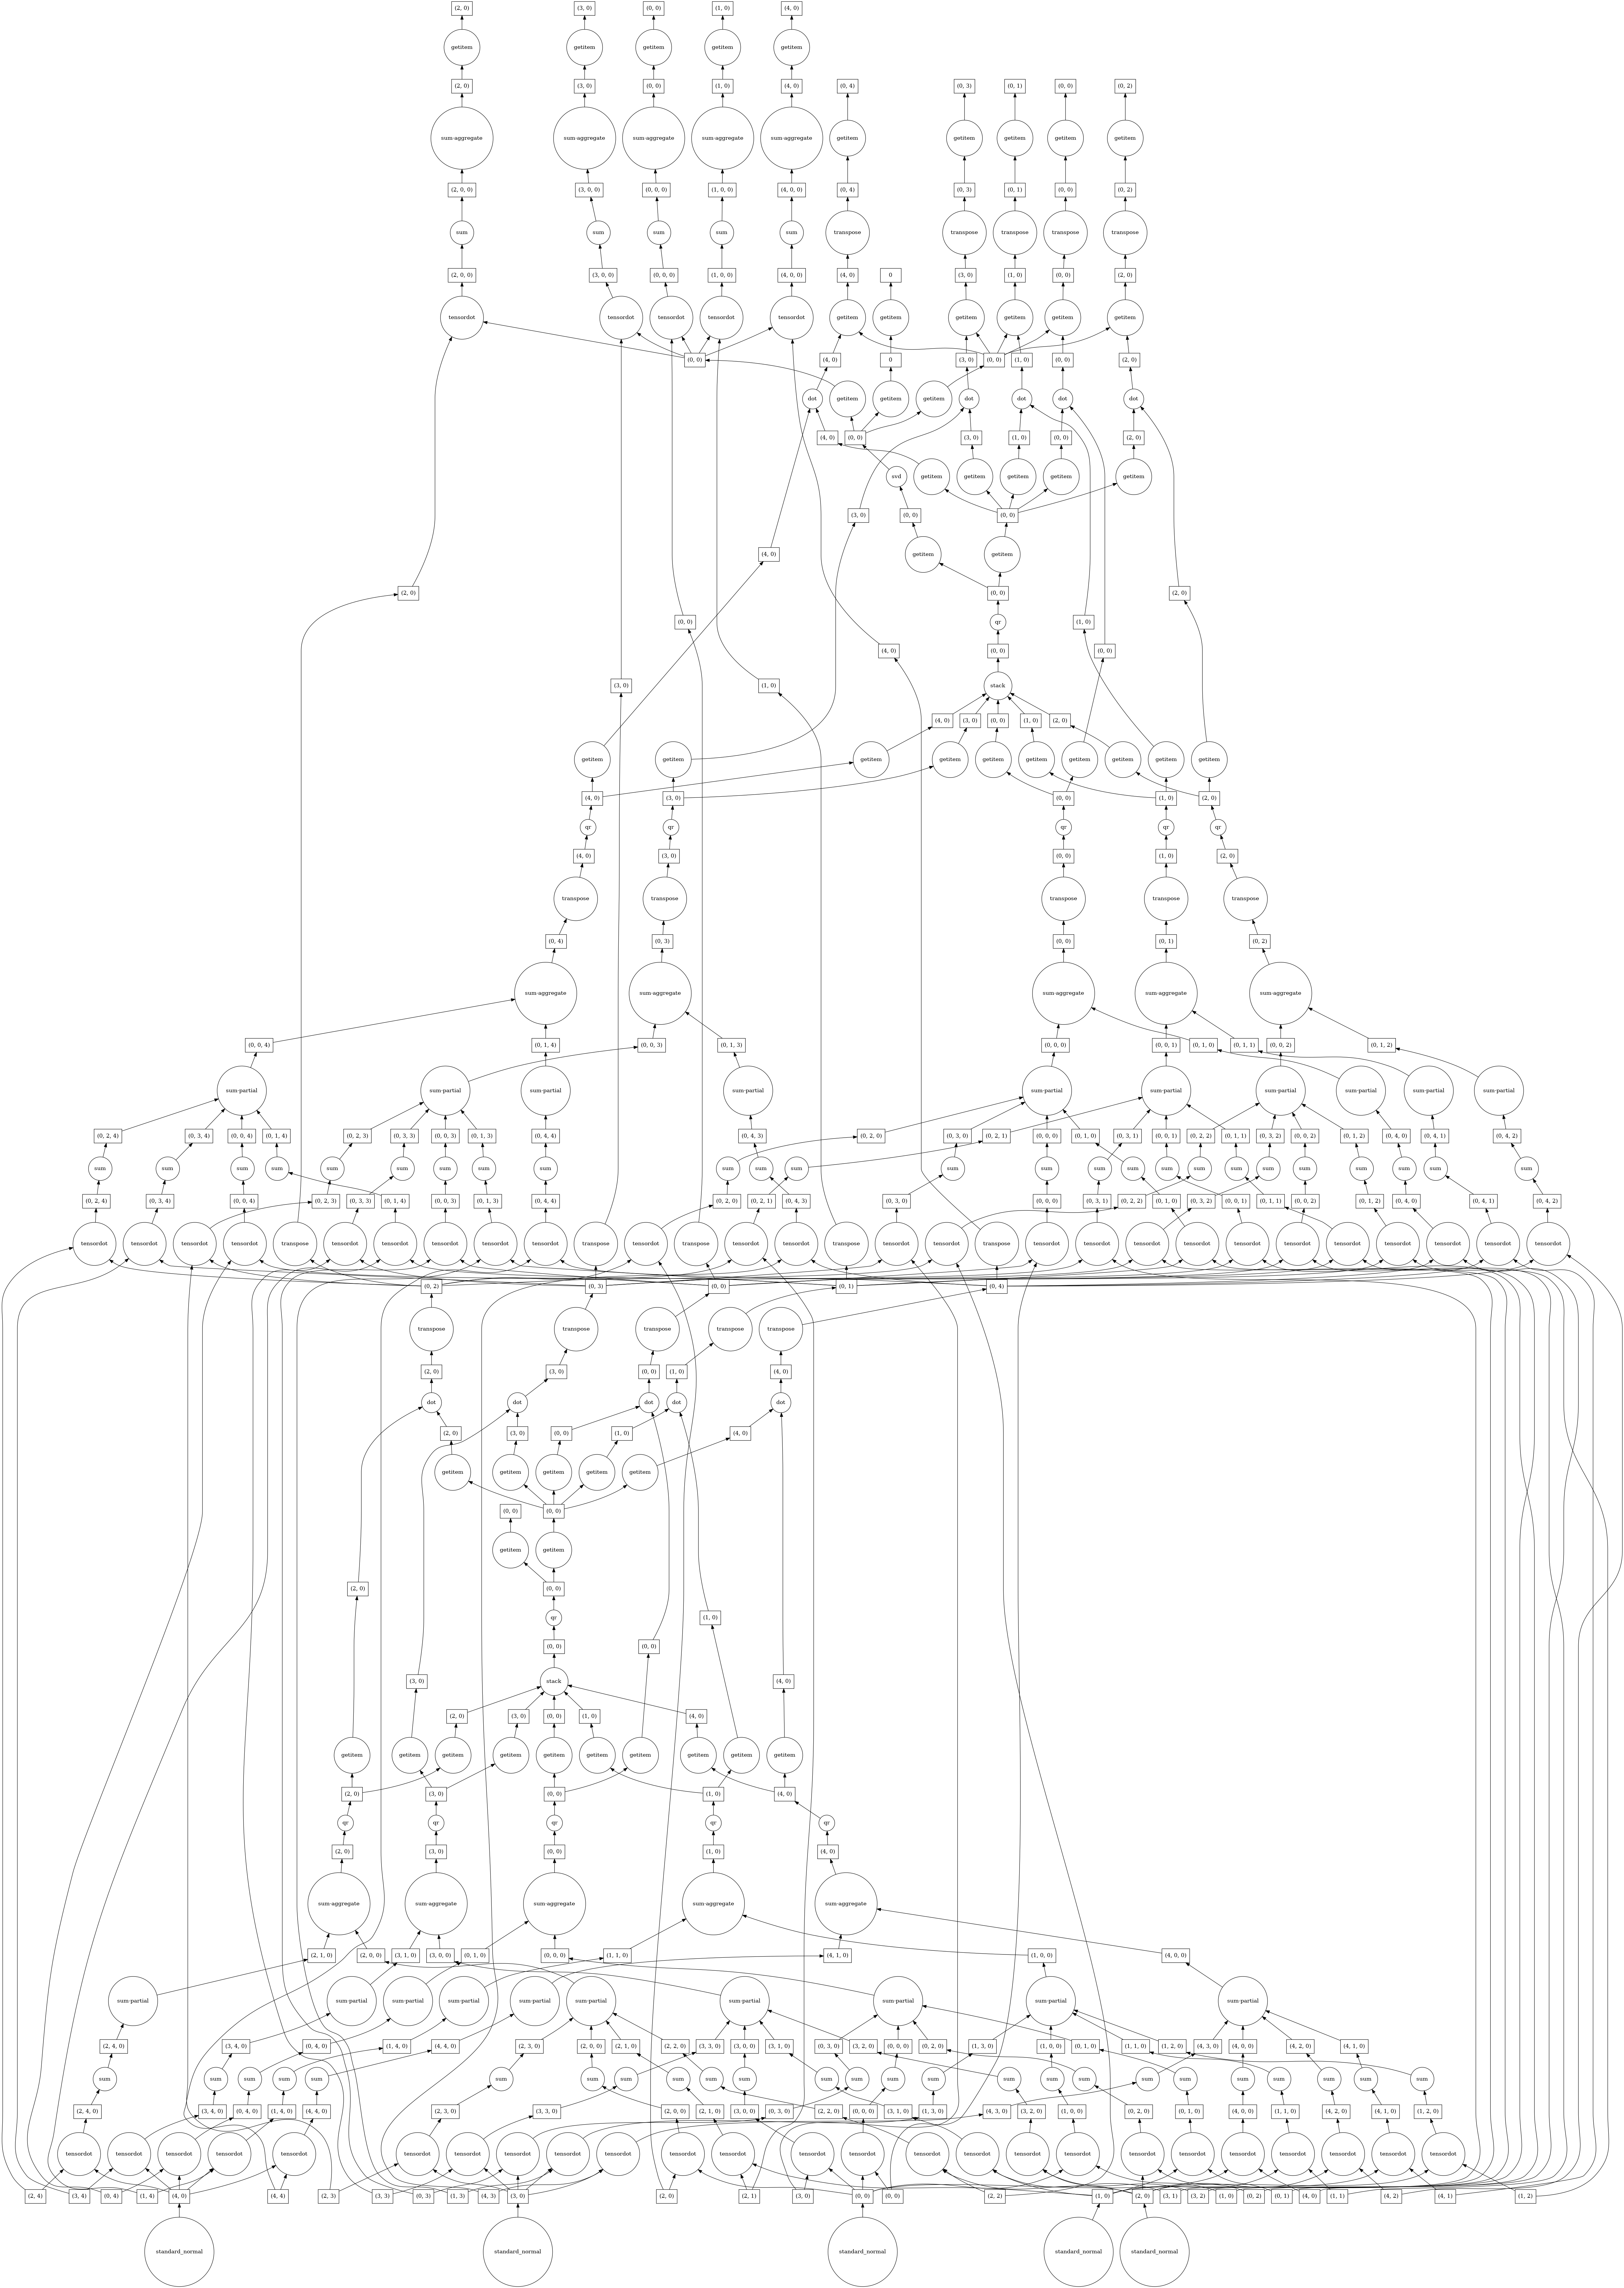

In [6]:
import dask

u, s, v = da.linalg.svd_compressed(X, k=5)
dask.visualize(u, s, v)

In [7]:
v.compute()

array([[ 0.01004522,  0.01000598,  0.00997705, ...,  0.01005469,
         0.01003445,  0.00991267],
       [-0.00148152, -0.00034924,  0.0008204 , ..., -0.00712671,
        -0.01777815,  0.00089419],
       [ 0.00836591, -0.00560589, -0.00769552, ...,  0.01988116,
        -0.00614814, -0.00966482],
       [-0.01687992,  0.0019154 , -0.01155598, ..., -0.00252372,
        -0.01524457,  0.01837242],
       [-0.00783259, -0.00521207, -0.00039663, ..., -0.00298726,
         0.00661466,  0.00912178]])